## 3 Questions to answer - 

### 1. Which customers have the highest spend probability in next 90 days ?

### 2. Which customers have recently purchased but unlikely to buy ? (look at customers have bought anything in last 90 days but have a lower purchase probability as per the model(less than 20%)) - revive the customer before they die

### 3. Which customers were predicted to purchase but didn't(missed opportunities) ? (people who were predicted to spend a certain amount and had a higher purchase probability in the next 90 days but actually spent 0 dollars) - get the marketing team to send these people targeted emails because these are missed opportunities that can boost the revenue quite significantly 

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotnine as pn

pn.options.dpi = 300

In [27]:
cdnow_df = pd.read_csv("data/CDNOW_master.txt",
                          sep = "\s+",
                          names = ["customer_id","date","quantity","price"])

In [28]:
cdnow_df.head()

,customer_id,date,quantity,price
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [29]:
cdnow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  69659 non-null  int64  
 1   date         69659 non-null  int64  
 2   quantity     69659 non-null  int64  
 3   price        69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [30]:
cdnow_df.date = cdnow_df.date.astype(str)
cdnow_df.date = pd.to_datetime(cdnow_df.date)

In [31]:
cdnow_df.head()

,customer_id,date,quantity,price
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,2,1997-01-12,5,77.00
3,3,1997-01-02,2,20.76
4,3,1997-03-30,2,20.76


In [32]:
## Cohort Analysis

# Get Customers who joined on during a specific time window

cdnow_first_purchase_table = cdnow_df\
                             .sort_values(by=['customer_id','date'])\
                             .groupby('customer_id')\
                             .first()
                 
cdnow_first_purchase_table

,date,quantity,price
customer_id,,,
1,1997-01-01,1,11.77
2,1997-01-12,1,12.00
3,1997-01-02,2,20.76
4,1997-01-01,2,29.33
5,1997-01-01,2,29.33
...,...,...,...
23566,1997-03-25,2,36.00
23567,1997-03-25,1,20.97
23568,1997-03-25,1,22.97


In [33]:
cdnow_first_purchase_table.date.min()

Timestamp('1997-01-01 00:00:00')

In [34]:
cdnow_first_purchase_table.date.max()

Timestamp('1997-03-25 00:00:00')

<AxesSubplot:xlabel='date'>

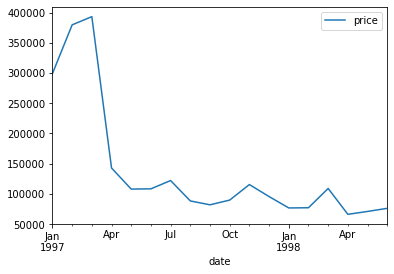

In [49]:
# Visualize : all purchases within a cohort

cdnow_df\
    .set_index('date')\
    [['price']]\
    .resample(rule = 'MS')\
    .sum()\
    .plot()

In [53]:
# Visualize : individual customer purchases

ids = cdnow_df.customer_id.unique()
ids_selected = ids[:10]

ids_selected

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [58]:
cdnow_cust_id_subset_df = cdnow_df[cdnow_df.customer_id.isin(ids_selected)]\
                          .groupby(['customer_id','date'])\
                          .sum()\
                          .reset_index()

In [74]:
cdnow_cust_id_subset_df

,customer_id,date,quantity,price
0,1,1997-01-01,1,11.77
1,2,1997-01-12,6,89.00
2,3,1997-01-02,2,20.76
3,3,1997-03-30,2,20.76
4,3,1997-04-02,2,19.54
5,3,1997-11-15,5,57.45
6,3,1997-11-25,4,20.96
7,3,1998-05-28,1,16.99
8,4,1997-01-01,2,29.33
9,4,1997-01-18,2,29.73


/opt/anaconda3/lib/python3.8/site-packages/plotnine/geoms/geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
/opt/anaconda3/lib/python3.8/site-packages/plotnine/geoms/geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
/opt/anaconda3/lib/python3.8/site-packages/plotnine/geoms/geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


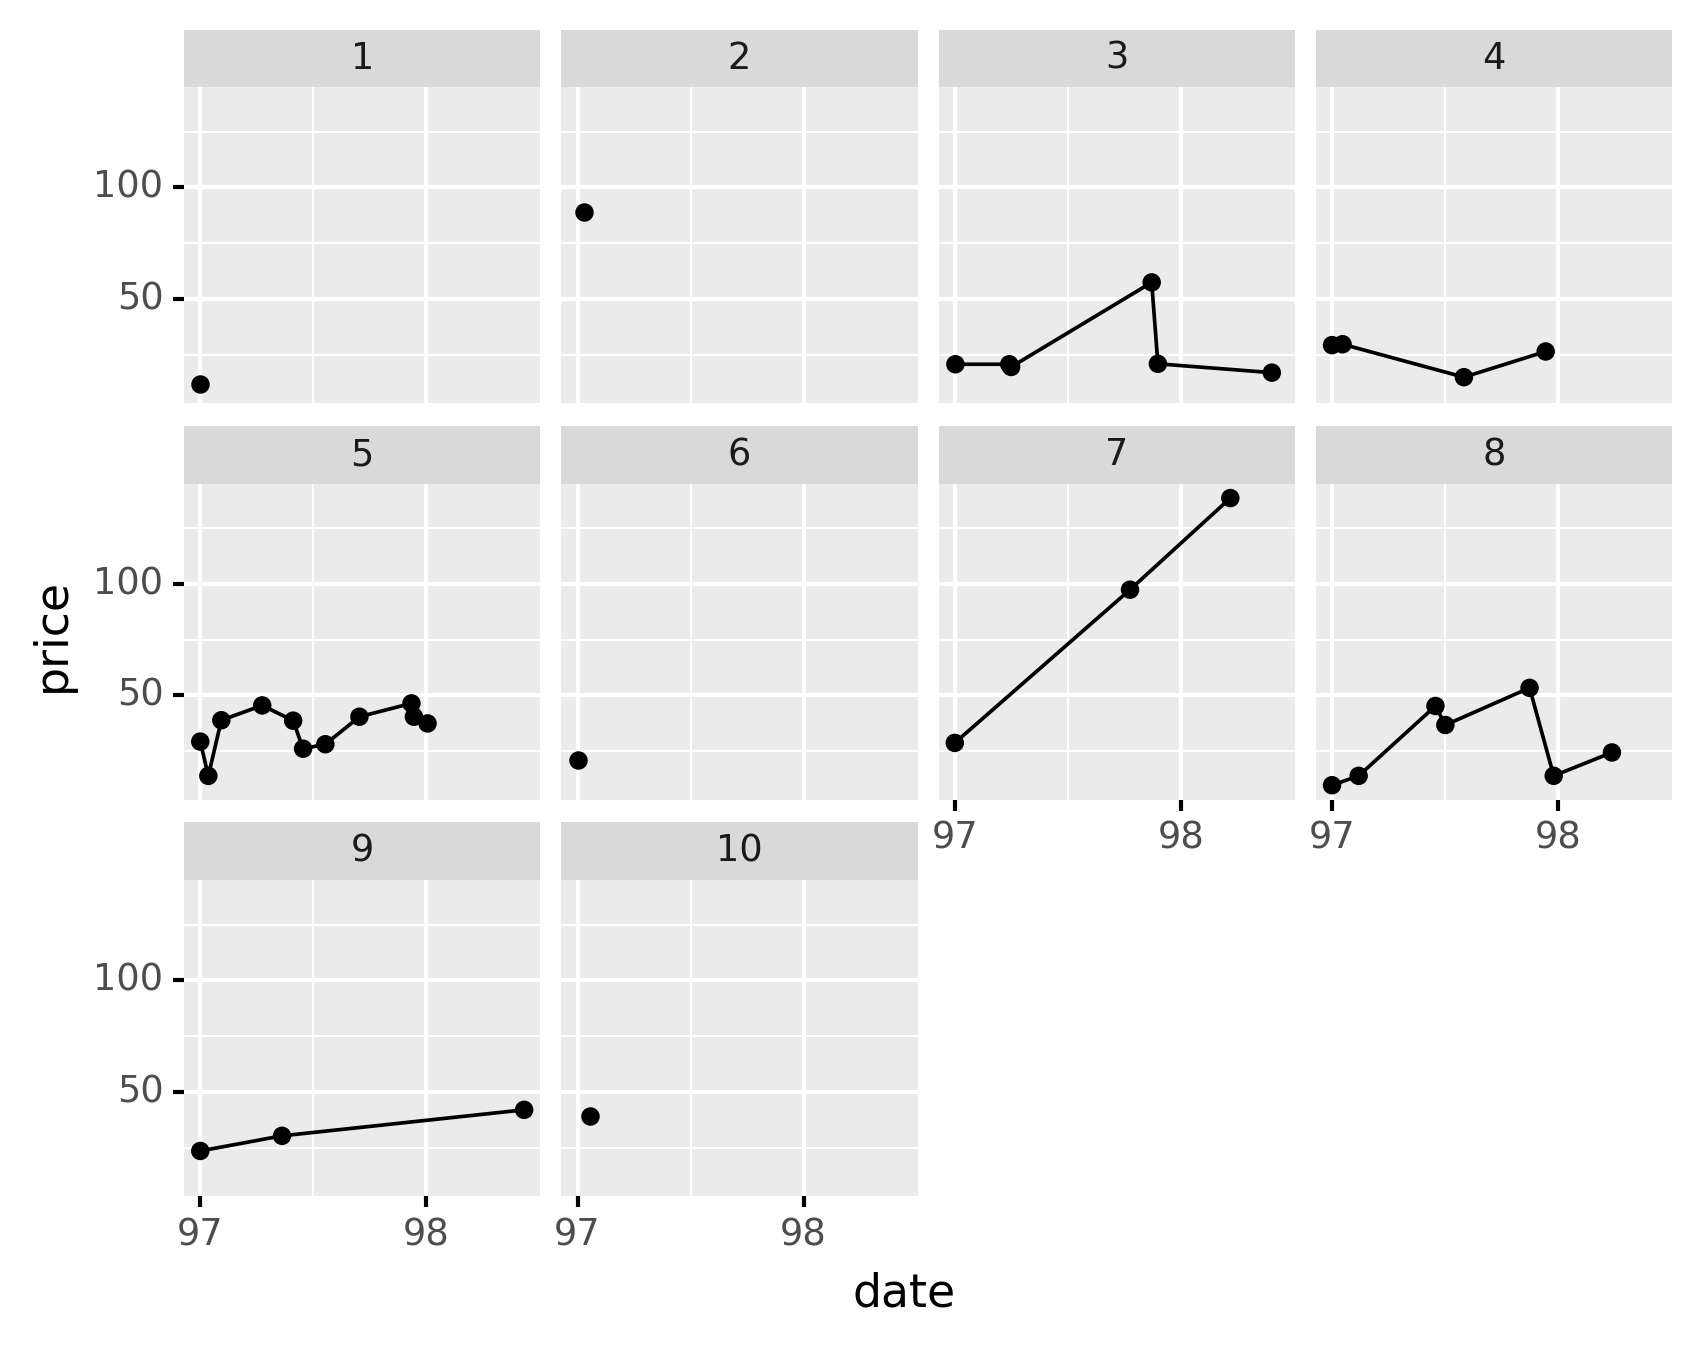

<ggplot: (8775408649798)>

In [77]:
pn.ggplot(
    pn.aes('date','price',group = 'customer_id'),
    data = cdnow_cust_id_subset_df 
)\
    + pn.geom_line()\
    + pn.geom_point()\
    + pn.facet_wrap('customer_id')\
    + pn.scale_x_date(date_breaks = "1 year",date_labels="%y")


In [78]:
# Machine Learning -  

# Framing the problem

# 1. What will the customers spend in the next 90 days(Regression)
# 2. What is the probability of the customer to make a purchase in the next 90 days(Classification)


In [84]:
# Temporal Splitting

n_days = 90
max_date = cdnow_df.date.max()
print("Max date : ", max_date)

cutoff = max_date - pd.to_timedelta(n_days , unit = "d")
print("Cutoff date : ", cutoff)

temporal_in_df = cdnow_df[cdnow_df.date <= cutoff]

temporal_out_df = cdnow_df[cdnow_df.date > cutoff]

Max date :  1998-06-30 00:00:00
Cutoff date :  1998-04-01 00:00:00


In [100]:
temporal_out_df

,customer_id,date,quantity,price
8,3,1998-05-28,1,16.99
38,9,1998-06-08,2,41.98
68,25,1998-04-17,1,12.99
69,25,1998-05-25,1,10.49
70,25,1998-06-03,3,24.97
...,...,...,...,...
69583,23534,1998-05-02,1,10.48
69623,23555,1998-05-01,4,49.96
69624,23555,1998-06-10,2,27.48
69631,23556,1998-06-07,2,28.98


In [87]:
## Feature Engineering(RFM)

# 2 Stage process
# Need to frame the problem
# Need to think about what features to include

In [97]:
# Make targets from the out data

targets_df = temporal_out_df\
            .drop('quantity',axis=1)\
            .groupby('customer_id')\
            .sum()\
            .rename(columns = {"price":"spend_90_total"})\
            .assign(spend_90_flag = 1)

In [98]:
# Not all customers are present - in fact, only about 3300 customer out of 25000 are present
targets_df

,spend_90_total,spend_90_flag
customer_id,,
3,16.99,1
9,41.98,1
25,73.43,1
29,48.45,1
31,117.99,1
...,...,...
23529,40.56,1
23534,10.48,1
23555,77.44,1


In [106]:
# Make Recency(date) features from in data - 

max_date = temporal_in_df.date.max()

recency_features_df = temporal_in_df[['customer_id','date']]\
                      .groupby('customer_id')\
                      .apply(lambda x : (x.date.max() - max_date) / pd.to_timedelta(1,"d"))\
                      .to_frame()\
                      .set_axis(["recency"],axis = 1)

In [107]:
recency_features_df

,recency
customer_id,
1,-455.0
2,-444.0
3,-127.0
4,-110.0
5,-88.0
...,...
23566,-372.0
23567,-372.0
23568,-344.0


In [109]:
# Make Frequency(count) features from in data - 

frequency_features_df = temporal_in_df[['customer_id','date']]\
                      .groupby('customer_id')\
                      .count()\
                      .set_axis(["frequency"],axis = 1)

In [110]:
frequency_features_df

,frequency
customer_id,
1,1
2,2
3,5
4,4
5,11
...,...
23566,1
23567,1
23568,3


In [112]:
# Make Price(monetary) features from in data - 

price_features_df = temporal_in_df\
                      .groupby('customer_id')\
                      .aggregate(
                        {
                            "price" : ["sum","mean"]
                        }
                      )\
                      .set_axis(["price_sum","price_mean"],axis = 1)

In [113]:
price_features_df

,price_sum,price_mean
customer_id,,
1,11.77,11.770000
2,89.00,44.500000
3,139.47,27.894000
4,100.50,25.125000
5,385.61,35.055455
...,...,...
23566,36.00,36.000000
23567,20.97,20.970000
23568,121.70,40.566667


In [129]:
## Combine All the features

features_df = pd.concat([recency_features_df,frequency_features_df,price_features_df],axis=1)

In [130]:
features_df

,recency,frequency,price_sum,price_mean
customer_id,,,,
1,-455.0,1,11.77,11.770000
2,-444.0,2,89.00,44.500000
3,-127.0,5,139.47,27.894000
4,-110.0,4,100.50,25.125000
5,-88.0,11,385.61,35.055455
...,...,...,...,...
23566,-372.0,1,36.00,36.000000
23567,-372.0,1,20.97,20.970000
23568,-344.0,3,121.70,40.566667


In [131]:
targets_df

,spend_90_total,spend_90_flag
customer_id,,
3,16.99,1
9,41.98,1
25,73.43,1
29,48.45,1
31,117.99,1
...,...,...
23529,40.56,1
23534,10.48,1
23555,77.44,1


In [132]:
features_df = features_df.merge(targets_df,on="customer_id", how="left").fillna(0)

In [133]:
## Machine Learning Model Building

from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import GridSearchCV

X = features_df[['recency','frequency','price_sum','price_mean']]

In [134]:
# Next 90 days spend amount prediction

y_spend = features_df['spend_90_total']

In [137]:
xgb_reg_spec = XGBRegressor(objective = "reg:squarederror",random_state = 42)

xgb_reg_model = GridSearchCV(
    estimator = xgb_reg_spec,
    param_grid = dict(
        learning_rate = [0.01,0.1,0.3,0.5]
    ),
    scoring = "neg_mean_absolute_error",
    refit = True,
    cv = 5
)

xgb_reg_model.fit(X,y_spend)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=42, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
         

In [138]:
xgb_reg_model.best_score_

-9.798940736745038

In [139]:
xgb_reg_model.best_params_

{'learning_rate': 0.01}

In [140]:
xgb_reg_model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [141]:
predictions_reg = xgb_reg_model.predict(X)

In [144]:
predictions_reg

array([0.76148176, 1.7241197 , 8.92676   , ..., 3.2925851 , 0.8648808 ,
       2.1359034 ], dtype=float32)

In [ ]:
# Next 90 days purchase probability

y_prob = features_df['spend_90_flag']

xgb_clf_spec = XGBClassifier(objective = "binary:logistic",random_state = 42)

xgb_clf_model = GridSearchCV(
    estimator = xgb_clf_spec,
    param_grid=dict(
        learning_rate = [0.01,0.1,0.3,0.5]
    ),
    scoring = 'roc_auc',
    refit = True,
    cv = 5
)

xgb_clf_model.fit(X,y_spend)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[13:24:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
xgb_clf_model.best_score_

In [ ]:
xgb_clf_model.best_params_

In [ ]:
xgb_clf_model.best_estimator_

In [ ]:
predictions_clf = xgb_clf_model.predict_proba(X)

In [ ]:
predictions_clf

### Get the feature importance 

In [ ]:
imp_spend_amount_dict = xgb_reg_model.best_estimator_\
                                     .get_booster()\
                                     .get_score(importance_type = 'gini')   